**Copyright 2022 Sapienza NLP research group (http://nlp.uniroma1.it/)**

Authors: Andrei Stefan Bejgu, Riccardo Orlando, Alessandro Scirè, Simone Tedeschi, Roberto Navigli

Part of this notebook is taken from https://huggingface.co/docs/transformers/ and https://huggingface.co/course

# What is a Transformer?

Transformers were originally introduced in the paper [*Attention is All You Need*](https://arxiv.org/abs/1706.03762). Recurrent Networks were, until now, one of the best ways to capture the timely dependencies in sequences. However, Transformer architecture does not imply any recurrence (GRU, LSTM, etc.) for its representations, but instead uses a layer called **attention layer**: this layer will tell the model to pay specific **attention** to certain words in the sentence you passed it when dealing with the representation of each word.

A Transformer is primarily composed of two blocks:

- **Encoder**: The encoder receives an input and builds a representation of it. This means that the model is optimized to acquire understanding from the input.
- **Decoder**: The decoder uses the encoder’s representation along with other inputs to generate a target sequence. This means that the model is optimized for generating outputs.

Each of these parts can be also used independently, depending on the task:

- **Encoder-only models**: Good for tasks that require understanding of the input, such as sentence classification and named entity recognition.
- **Decoder-only models**: Good for generative tasks such as text generation.
- **Encoder-decoder models or sequence-to-sequence models**: Good for generative tasks that require an input, such as translation or summarization.


## Encoders and Decoders

The Encoder is on the left and the Decoder is on the right. Both Encoder and Decoder are composed of modules that can be stacked on top of each other multiple times. The modules consist mainly of attention layers, called Multi-Head Attention and Feed Forward layers.

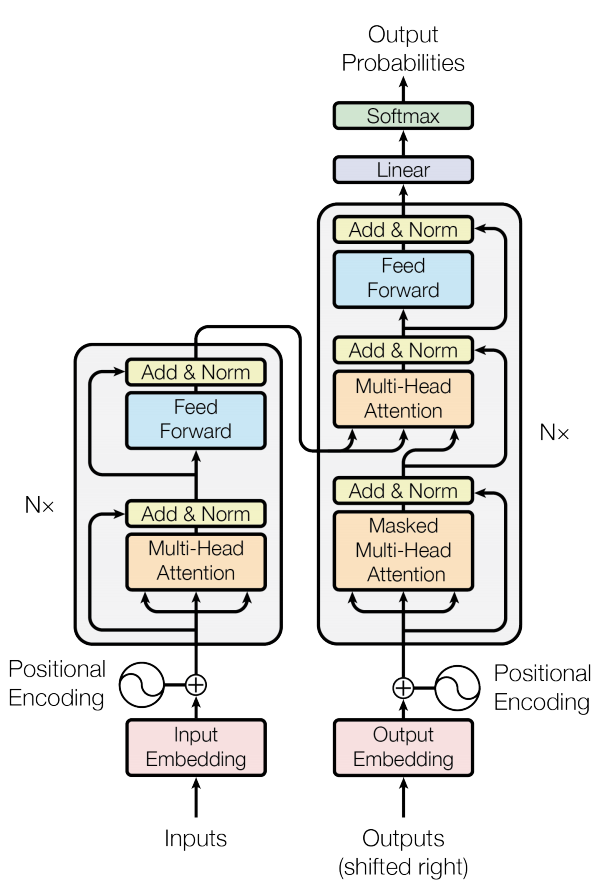

### Multi-Head Attention

The attention mechanism takes query $Q$ that represents a vector word, the keys $K$ which are all other words in the sentence, and value $V$ represents the vector of the word. The output is computed as a weighted sum of the values, where the weight assigned to each value is computed by a compatibility function of the query with the corresponding key. These queries, keys and value matrices are combined for each head in a matrix manipulation called scaled dot product attention. The attention highlights which input sequences the head pays attention to, and to what degree. The equation  shows how the scaled dot-product attention is computed.

\\[ \textrm{Attention}(Q,K, V) = \textrm{softmax}(\frac{QK^T}{\sqrt{d_k}})V \\]

The attention mechanism is repeated multiple times with linear projections of $Q$, $K$ and $V$. This allows the system to learn from the different representations, which is beneficial to the model.


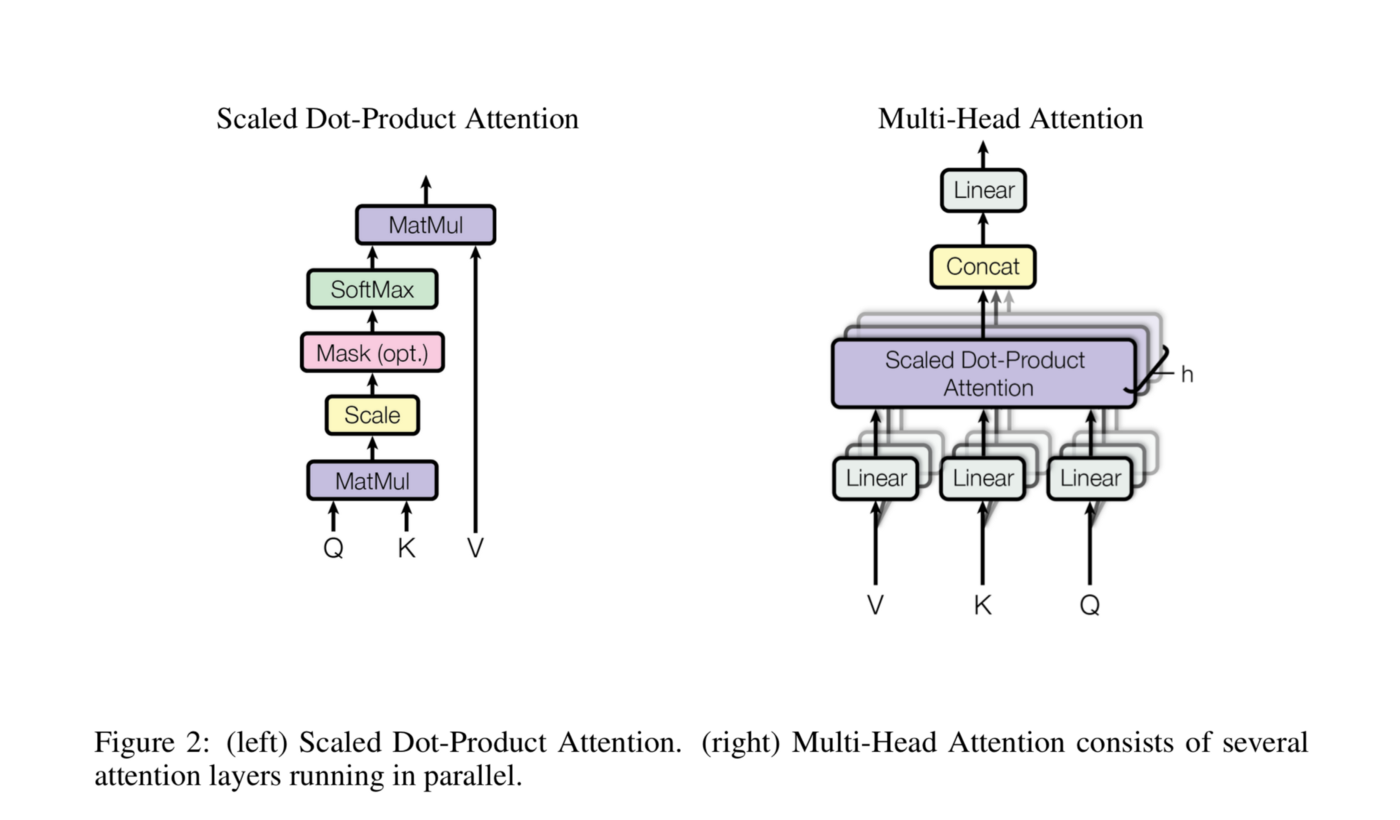

### Positional Encodings

An important part of the model is the positional encoding of the different words. Since we have no recurrent networks that can remember how sequences are fed into a model, we need to somehow give every word a relative position in the sequence, to keep its order relevant to the model. These positions are added to the embedding representation of each word. The positional encoding blocks injects information about the position of each word vector by concatenating sine and cosine functions of different frequencies to these vectors.

\\[ PE_{(pos, 2i)} = sin(pos / 10000^{2i / d_{model}}) \\]
\\[ PE_{(pos, 2i + 1)} = cos(pos / 10000^{2i / d_{model}}) \\]

Given these equations, if we consider an input with 10,000 possible positions, the positional encoding block will add sine and cosine values with wavelengths that increase geometrically from 2𝝅 to 10000*2𝝅. This allows us to represent the relative position of word vectors such that a neural network can learn to recognize differences in position.

# History of Transformer models

The focus of the original work was on translation tasks. This was followed by the introduction of several influential models, including:

- June 2018: GPT, the first pretrained Transformer model, used for fine-tuning on various NLP tasks and obtained state-of-the-art results

- October 2018: **BERT**, another large pretrained model, this one designed to produce better summaries of sentences (more on this in the next chapter!)

- February 2019: GPT-2, an improved (and bigger) version of GPT that was not immediately publicly released due to ethical concerns

- October 2019: DistilBERT, a distilled version of BERT that is 60% faster, 40% lighter in memory, and still retains 97% of BERT’s performance

- October 2019: **BART** and **T5**, two large pretrained models using the same architecture as the original Transformer model (the first to do so)

- May 2020, GPT-3, an even bigger version of GPT-2 that is able to perform well on a variety of tasks without the need for fine-tuning (called zero-shot learning)

This list is far from comprehensive, and is just meant to highlight a few of the different kinds of Transformer models. Broadly, they can be grouped into three categories:

- **GPT-like** (also called auto-regressive Transformer models)
- **BERT-like** (also called auto-encoding Transformer models)
- **BART/T5-like** (also called sequence-to-sequence Transformer models)

# PLMs (Pre-trained Language Models)

All the Transformer models mentioned above have been trained as ***language models***. This means they have been trained on large amounts of raw text in a self-supervised fashion. Self-supervised learning is a type of training in which the objective is automatically computed from the inputs of the model.

This type of model develops a statistical understanding of the language it has been trained on, but it’s not very useful for specific practical tasks. Because of this, the general pretrained model then goes through a process called *transfer learning*. During this process, the model is **fine-tuned** in a supervised way on a given task.

## How to use these Transformers?

But how can you use these Transformer models? Thanks to HugginFace's [🤗Transformers](https://huggingface.co/docs/transformers/index) library it is quite easy to integrate transformer-based models in your architecture: its goal is to provide a single API through which any Transformer model can be loaded, trained, and saved.

🤗Transformers library consists of two key elements:

- **Models**: as stated a few paragraphs above, researchers have proposed a variety of transformers-derived architectures. The API provides both implementation and weights for a lot of these models.
- **Tokenizers**: like other neural networks, Transformer models can’t process raw text directly, so the first step is to convert the text inputs into numbers that the model can make sense of. Each model may have its own way of tokenization. The tokenizer will handle that for you.

Let's now look more in details at these two components.

### Models

First you need to install the library. It is compatible with both PyTorch and TensorFlow (and also JAX), we will use the former for this notebook:


In [ ]:
!pip install transformers

Then we can start using the various implementations of `PretrainedModel` and `PretrainedTokenizer`. For this notebook we will use BERT models, in particular `bert-base-cased`. This string is the identifier used to load the model, but can be the identifier of any model string on the Model Hub, as long as it is compatible with the BERT architecture. The entire list of available BERT checkpoints can be found [here](https://huggingface.co/models?filter=bert).

Loading a pre-trained Transformer model is simple. We can do this using the `from_pretrained()` method:

In [ ]:
from transformers import BertModel

model = BertModel.from_pretrained("bert-base-cased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

This model is now initialized with all the weights of the checkpoint. It can be used directly for inference on the tasks it was trained on, and it can also be fine-tuned on a new task. By training with **pretrained weights** rather than from scratch, we can quickly achieve good results.

**Tip:** the `AutoModel` class and all of its relatives are actually simple wrappers over the wide variety of models available in the library. It’s a clever wrapper as it can automatically guess the appropriate model architecture for your checkpoint, and then instantiates a model with this architecture.

In [ ]:
from transformers import AutoModel

auto_model = AutoModel.from_pretrained("bert-base-cased")

print(f"\nmodel class is      : {type(model)}")
print(f"auto_model class is : {type(auto_model)}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

NameError: name 'model' is not defined

#### Using a Transformer model for inference

Transformer models can only process numbers that the tokenizer generates. But before we discuss tokenizers, let’s explore what inputs the model accepts.

Consider the following words:

In [ ]:
words = ["Hello!", "Cool.", "Nice!"]

The tokenizer converts these to vocabulary indices which are typically called *input IDs*.
The resulting output is:

In [ ]:
encoded_words = [
    [101, 7592, 999, 102],  # [CLS] Hello ! [SEP]
    [101, 4658, 1012, 102], # [CLS] Cool ! [SEP]
    [101, 3835, 999, 102],  # [CLS] Nice ! [SEP]
]

As you can see in the example, the tokenizer adds two ids (101, 102) at the beginning and the end of the vector. These ids correspond to *special tokens* that are markers for the beginning and the end of the sequence.

As per other PyTorch-based models, inputs must be converted to tensor-like objects


In [ ]:
import torch

model_inputs = torch.tensor(encoded_words)
model_inputs

tensor([[ 101, 7592,  999,  102],
        [ 101, 4658, 1012,  102],
        [ 101, 3835,  999,  102]])

Making use of the tensors with the model is extremely simple, we just call the model with the inputs:

In [ ]:
output = model(model_inputs)
output[0].shape

torch.Size([3, 4, 768])

While the model accepts a lot of different arguments, only the input IDs are necessary. We’ll explain what the other arguments do and when they are required later in this notebook, but first we need to take a closer look at the tokenizers that build the inputs that a Transformer model can understand.

### Tokenizers

Tokenizers are one of the core components of the common NLP pipeline. They serve one purpose: to translate text into data that can be processed by the model. Models can only process numbers, so tokenizers need to convert our text inputs to numerical data. A **tokenizer** is responsible for:

- Splitting the input into words, subwords, or symbols (like punctuation) that are called tokens
- Mapping each token to an integer
- Adding additional inputs that may be useful to the model

But let's go in order.

#### Tokenization

First, we need to *tokenize* the inputs. The first type of tokenizer that comes to mind is **word-based**. It is easy to build and requires few rules, like "split on spaces" or "split on punctuations". However, if we want to completely cover a language with a word-based tokenizer, we’ll need to have an identifier for each word in the language, which will generate a **huge amount of tokens**. For example, there are over 500,000 words in the English language, so to build a map from each word to an input ID we’d need to keep track of that many IDs. Moreover, we need a token to represent words that are not in our vocabulary. This is known as the **“unknown token"**, often represented as ”[UNK]”. It’s generally a bad sign if you see that the tokenizer is producing a lot of these tokens, as it wasn’t able to retrieve a sensible representation of a word and you’re losing information along the way. The goal when crafting the vocabulary is to do it in such a way that the tokenizer tokenizes as few words as possible into the unknown token.

One way to **reduce the amount of tokens** (and unknown tokens at the same time) is **subword-based tokenization**.

**Subword tokenization** algorithms rely on the principle that frequently used words should not be split into smaller subwords, but rare words should be decomposed into meaningful subwords.

For instance, “annoyingly” might be considered a rare word and could be decomposed into “annoying” and “ly”. These are both likely to appear more frequently as standalone subwords, while at the same time the meaning of “annoyingly” is kept by the composite meaning of “annoying” and “ly”.

Here is an example showing how a subword tokenization algorithm would tokenize the sequence “Let’s do tokenization!“:

`[Let’s</w>, do</w>, token, ization</w>, !</w>]`

These subwords end up providing a lot of semantic meaning: for instance, in the example above “tokenization” was split into “token” and “ization”, two tokens that have a semantic meaning while being space-efficient (only two tokens are needed to represent a long word). This allows us to have relatively good coverage with small vocabularies, and close to no unknown tokens.

There are many more techniques out there. For instance:

- **Byte-level BPE**, as used in GPT-2 and GPT-3 (merges bytes by frequency)
- **WordPiece**, as used in BERT (merges based on the highest likelihood of a language model, p(x, y)/(p(x)*p(y)))
- **SentencePiece** or **Unigram**, as used in several multilingual models (treats the sequence like a single stream, including spaces, useful for multilingual text)

See more at: https://huggingface.co/docs/transformers/tokenizer_summary

#### Encodings

Translating text to numbers is known as **encoding**. Encoding is done in a two-step process: the tokenization, followed by the **conversion to input IDs**. This second step consists of converting those tokens into numbers, so we can build a tensor out of them and feed them to the model. To do this, the tokenizer has a **vocabulary**, built during the pre-training of the PLM: we need to use the same vocabulary used when the model was pretrained!

Fortunately, 🤗 Transformers library provides a series of **pre-trained tokenizers**, together with their model, ready to be used :).

We first need to download that information from the Model Hub. To do this, we use the `AutoTokenizer` class and its `from_pretrained()` method. Using the checkpoint name of our model, it will automatically fetch the data associated with the model’s tokenizer and cache it (so it’s only downloaded the first time you run the code below).

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Using a Transformer network is simple; Transform it ; form it"
tokens = tokenizer.tokenize(sequence)

print(tokens)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple', ';', 'Trans', '##form', 'it', ';', 'form', 'it']


This tokenizer is a subword tokenizer: it splits the words until it obtains tokens that can be represented by its vocabulary. That’s the case here with transformer, which is split into two tokens: `trans` and `##former`.

The conversion to input IDs is handled by the `convert_tokens_to_ids()` tokenizer method:

In [ ]:
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

[7993, 170, 13809, 23763, 2443, 1110, 3014, 132, 13809, 13199, 1122, 132, 1532, 1122]


Or you can do everything in one pass

In [ ]:
 tokenizer(sequence)

 # returns a dictionary with the input_ids, their token_type (0 or 1, see BERT's distinction of what comes before [SEP] and what after [SEP] in next-sentence prediction), attention mask (used for padding shorter sentences)


{'input_ids': [101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 132, 13809, 13199, 1122, 132, 1532, 1122, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

These outputs, once converted to the appropriate framework tensor, can then be used as inputs to a model.

*Decoding* is going the other way around: from vocabulary indices, we want to get a string. This can be done with the `decode()` method as follows:

In [ ]:
decoded_string = tokenizer.decode([7993, 170, 13809, 23763, 2443, 1110, 3014])
print(decoded_string)

# Note that the model is case-sensitive:
decoded_string = tokenizer.decode([7993, 170, 11303, 1200, 2443, 1110, 3014])
print(decoded_string)

Using a Transformer network is simple
Using a transformer network is simple


Note that the decode method not only converts the indices back to tokens, but also groups together the tokens that were part of the same words to produce a readable sentence.

#### Models expect a batch of inputs

🤗 Transformers models expect multiple sentences by default. The tokenizer, with the right paramters, will handle that for you:

In [ ]:
sequence = "This is an example sentence to show batching."
tokenized_inputs = tokenizer(sequence, return_tensors="pt")  # "pt" -> return PyTorch torch.Tensor objects, rather than a list of tokens
print(tokenized_inputs["input_ids"])

tensor([[  101,  1188,  1110,  1126,  1859,  5650,  1106,  1437, 15817,  1158,
           119,   102]])


The output has now an additional dimension. **Batching** is the act of sending multiple sentences through the model, all at once. If you only have one sentence, you can just build a batch with a single sequence, like we did here.

**Batching** allows the model to work when you feed it multiple sentences. Using multiple sequences is just as simple as building a batch with a single sequence. There’s a second issue, though. When you’re trying to batch together two (or more) sentences, they might be of different lengths. If you’ve ever worked with tensors before, you know that they need to be of rectangular shape, so you won’t be able to convert the list of input IDs into a tensor directly. To work around this problem, we usually **pad** the inputs.

The Tokenizer class will handle that for you, by just telling to pad the input with `padding=True`:

In [ ]:
sequence_a = "This is a short sequence."
sequence_b = "This is a rather long sequence. It is at least longer than the sequence A."

padded_sequences = tokenizer([sequence_a, sequence_b], padding=True)
print(padded_sequences["input_ids"])

[[101, 1188, 1110, 170, 1603, 4954, 119, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1188, 1110, 170, 1897, 1263, 4954, 119, 1135, 1110, 1120, 1655, 2039, 1190, 1103, 4954, 138, 119, 102]]


The first sample of `padded_sequences` now has a bunch of zeros (the default padding value for BERT), to match the shape of the second sentence.

As you may have noticed, the output of the tokenizer - `tokenized_inputs` and `padded_sequences` - contains more than the IDs.

In [ ]:
tokenized_inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

It contains indeed three things: `input_ids`, `token_type_ids`, `attention_mask`.

##### Attention Mask

The **attention mask** is used when batching sequences together. This argument indicates to the model which tokens should be attended to, and which should not.

For example, consider these two sequences (we keep using the same tokenizer as before):

In [ ]:
sequence_a = "This is a short sequence."
sequence_b = "This is a rather long sequence. It is at least longer than the sequence A."

encoded_sequence_a = tokenizer(sequence_a)["input_ids"]
encoded_sequence_b = tokenizer(sequence_b)["input_ids"]

print(len(encoded_sequence_a), len(encoded_sequence_b))

8 19


Therefore, we can’t put them together in the same tensor as-is. The first sequence needs to be padded up to the length of the second one, or the second one needs to be truncated down to the length of the first one.

In the first case, the list of IDs will be extended by the padding indices. We can pass a list to the tokenizer and ask it to pad like this:

In [ ]:
padded_sequences = tokenizer([sequence_a, sequence_b], padding=True)
print(padded_sequences["input_ids"])

[[101, 1188, 1110, 170, 1603, 4954, 119, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1188, 1110, 170, 1897, 1263, 4954, 119, 1135, 1110, 1120, 1655, 2039, 1190, 1103, 4954, 138, 119, 102]]


We can see that 0s have been added on the right of the first sentence to make it the same length as the second one.

The attention mask is a binary tensor indicating the position of the padded indices so that the model does not attend to them. For the `BertTokenizer`, `1` indicates a value that should be attended to, while `0` indicates a padded value. This attention mask is in the dictionary returned by the tokenizer under the key `attention_mask`:

In [ ]:
padded_sequences["attention_mask"]

[[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

#### Token Type IDs

Some models’ purpose is to do classification on pairs of sentences or question answering.

These require two different sequences to be joined in a single entry, which usually is performed with the help of special tokens, such as the classifier (`[CLS]`) and separator (`[SEP]`) tokens. For example, the BERT model builds its two sequence inputs as such:

```
# [CLS] SEQUENCE_A [SEP] SEQUENCE_B [SEP]
```

We can use our tokenizer to automatically generate such a sentence by passing the two sequences to tokenizer as two arguments (and not a list, like before) like this:

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
sequence_a = "HuggingFace is based in NYC"
sequence_b = "Where is HuggingFace based?"

encoded_dict = tokenizer(sequence_a, sequence_b)
print(encoded_dict["input_ids"])
decoded = tokenizer.decode(encoded_dict["input_ids"])

[101, 20164, 10932, 2271, 7954, 1110, 1359, 1107, 17520, 102, 2777, 1110, 20164, 10932, 2271, 7954, 1359, 136, 102]


which will return:

In [ ]:
decoded

'[CLS] HuggingFace is based in NYC [SEP] Where is HuggingFace based? [SEP]'

This is enough for some models to understand where one sequence ends and where another begins. However, other models, such as BERT, also deploy token type IDs. They are represented as a binary mask identifying the two types of sequence in the model.

The tokenizer returns this mask as the `token_type_ids` entry:

In [ ]:
encoded_dict["token_type_ids"]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]

The first sequence, the “context” used for the question, has all its tokens represented by a `0`, whereas the second sequence, corresponding to the “question”, has all its tokens represented by a `1`.

Some models, like [XLNetModel](https://huggingface.co/docs/transformers/v4.18.0/en/model_doc/xlnet#transformers.XLNetModel) use an additional token represented by a `2`. Others, like [XLM-RoBERTa](https://huggingface.co/docs/transformers/v4.18.0/en/model_doc/xlm-roberta), don't use the token type ID at all.

#### Limits

Before using Transformers in the wild, we would like to point out one of the limits of the architecture. With Transformer models, there is a limit to the lengths of the sequences we can pass the models. Most models handle sequences of up to `512` or `1024` tokens, and will crash when asked to process longer sequences. There are two solutions to this problem:

- Use a model with a longer supported sequence length.
- Truncate your sequences.

Models have different supported sequence lengths, and some specialize in handling very long sequences. [Longformer](https://huggingface.co/transformers/model_doc/longformer.html) is one example, and another is [LED](https://huggingface.co/transformers/model_doc/led.html).

Otherwise, you can truncate your sequences. You can do manually:

```
sequence = sequence[:max_sequence_length]
```

but remember that with Transformers you are dealing with multiple inputs.

You can also use the functionality provided by the tokenizer that will handle that for you using the `truncation` parameter:


In [ ]:
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]
tokens = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")

With `truncation=True` we are telling the tokenizer to truncate the input if it's longer than the model max supported length, but `truncation` and `padding` parameters can be combined to handle a lot of edge cases. For more information you can check the documentation [here](https://huggingface.co/docs/transformers/pad_truncation).

#### Put it all togheter

In [ ]:
from transformers import AutoTokenizer, AutoModel

checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModel.from_pretrained(checkpoint)
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

tokens = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")
# if you want to inspect how the tokenization was carried out
# print(tokenizer.convert_ids_to_tokens(tokens['input_ids'][0]))
print('input:', tokens)
output = model(**tokens)
print('output:', output)
print(output[0].shape)

['[CLS]', 'I', "'", 've', 'been', 'waiting', 'for', 'a', 'Hu', '##gging', '##F', '##ace', 'course', 'my', 'whole', 'life', '.', '[SEP]']
input: {'input_ids': tensor([[  101,   146,   112,  1396,  1151,  2613,  1111,   170, 20164, 10932,
          2271,  7954,  1736,  1139,  2006,  1297,   119,   102],
        [  101,  1573,  1138,   146,   106,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])}
output: BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.4222,  0.4443, -0.0659,  ..., -0.1958,  0.3611,  0.1284],
         [ 0.5728, -0.1593,  0.6014,  ..., -0.1134,  0.1791,  0.1787],
         [ 0.4699,  0.4214,  0.1695,  ...

If we look closely at the model output, we can see that there are actually more than one:

In [ ]:
output.keys()

odict_keys(['last_hidden_state', 'pooler_output'])

Each Transformer model returns different outputs, but don't worry, it's very simple. Here the most important ones:

- `last_hidden_state`: The output of the last layer of the model.

- `pooler_output`: Last layer hidden-state of the first token of the sequence (classification token) after further processing through the layers used for the auxiliary pretraining task. E.g. for BERT-family of models, this returns the classification token after processing through a linear layer and a tanh activation function. The linear layer weights are trained from the next sentence prediction (classification) objective during pretraining.

- `hidden_states`: Returned when `output_hidden_states=True` is passed or when `config.output_hidden_states=True`. It's a tuple containing the output at each hidden state of the Transformer model. `last_hidden_state` and the tensor of the last element of this tuple are the same tensor.

**Tip**: A rule of thumb that works most of the time is:

- `last_hidden_state` for token classification
- `pooler_output` for text classification

The `hidden_states` can also be manipulated to build a stronger sequence representation. A common practice is to concatenate/sum/average the last four hidden states, as opposed to taking just the last one.

### Differences with Word Vectors

Word vectors were widely used in NLP. Thanks to the pretraining process, they help to produce better representations for words. Contextualized embeddings are introduced to address the same problem with some improvements.


Word vector representations are static, so ambigous words will have a single representation that "mix" together all the meanings. On the other side, Transformers vectors are built for each word by taking into account its context.




In [ ]:
import gensim.downloader as api
wv = api.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


Similar words as we know will have similar representations

In [ ]:
wv.similarity("dog", "cat")

0.8798075

But... What happens when the **same word** has different meanings?

In [ ]:
wv.similarity("bank", "river"), wv.similarity("bank", "credit")

(0.3344932, 0.7037603)

In [ ]:
from transformers import AutoModel, AutoTokenizer

checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModel.from_pretrained(checkpoint)

In [ ]:
import torch

def get_word_2_indices(encoded, tokenizer):

    # we have to collect all the subtokenizations of the words
    w_id2input_ids = dict()
    # we have to keep track of the indices that compose the word
    # so we can use them to extract the embeddings
    w_id2_indices = dict()
    for idx, (w_id, input_id) in enumerate(zip(encoded.word_ids(), encoded.input_ids[0])):
        w_id2input_ids.setdefault(w_id, []).append(input_id)
        w_id2_indices.setdefault(w_id, []).append(idx)

    # now let's decode all the words that we have
    word2_indices = dict()
    for w_id, input_ids in w_id2input_ids.items():
        word = tokenizer.decode(input_ids)
        word2_indices[word] = w_id2_indices[w_id]
    return word2_indices

# produce word vectors by averaging
# all embeddings of the bpes of the word
def get_word_vector(sent, word, tokenizer, model):
    # encode_plus returns additional information such as the word ids.
    encoded = tokenizer.encode_plus(sent, return_tensors="pt")
    # to guarantee the tensors are on the same device as the model
    encoded = encoded.to(model.device)
    # get the mapping between the tokens and the indices of the embeddings
    word2_indices = get_word_2_indices(encoded, tokenizer)
    with torch.no_grad():
        output = model(**encoded)
    # we get the word embeddings of the last layer of the last hidden state
    last_hidden_state = output[0]
    # bert computes embeddings in batches we gave a single sentence
    # so we have just one element in the batch and can extract the token embeddings
    sentence_token_embeddings = last_hidden_state[0]

    # we take the embeddings correspondings to the indices of the BPEs that compose our word
    word_bpes_embeddings = sentence_token_embeddings[word2_indices[word]]
    # word_bpes_embeddings is a 2D-shaped matrix. dim=0 is needed to specify the axis to compute the mean along.
    # In this case, dim=0 is chosen since we want to average all the row vectors, which correspond to bpe embeddings.
    return word_bpes_embeddings.mean(dim=0)


def get_transformers_similarity(tokenizer, model, s1, s2, target_token_s1, target_token_s2=None):
    if target_token_s2 is None:
        target_token_s2 = target_token_s1

    word_embedding_s1 = get_word_vector(s1, target_token_s1, tokenizer, model)
    word_embedding_s2 = get_word_vector(s2, target_token_s2, tokenizer, model)
    return torch.cosine_similarity(word_embedding_s1.unsqueeze(dim=0), word_embedding_s2.unsqueeze(dim=0))

The word bank may assume different meanings depending on the context.

In [ ]:
get_transformers_similarity(tokenizer, model, "We fly from the Caribbean to North America by plane.", "He scratched the fly on his leg.", "fly")

tensor([0.6270])

In [ ]:
get_transformers_similarity(tokenizer, model, "We can't naturally fly, so we make airplanes.", "We fly from the Caribbean to North America by plane.", "fly")

tensor([0.8113])

In [ ]:
get_transformers_similarity(tokenizer, model, "He scratched the fly on his leg.", "The fly was sitting on his leg.", "fly")

tensor([0.8759])

In [ ]:
get_transformers_similarity(tokenizer, model, "I was looking at the ship while sitting on the river bank.", "I swam until I reached the bank.", "bank")

tensor([0.8503])

In [ ]:
get_transformers_similarity(tokenizer, model, "I was looking at the ship while sitting on the river bank.", "I went to the bank and withdrew some money.", "bank")

tensor([0.6513])

### A more practical example: NER with Transformers

Now that you know how to use the 🤗Transformers library, let's have a look at how to use it in a real world example.

For the sake of semplicity we will use the [🤗Datasets](https://huggingface.co/docs/datasets/index) library to load the [CoNLL-2003](https://huggingface.co/datasets/conll2003) dataset for NER.

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 23.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


Here we define a few parameters for our little experiment

In [ ]:
import torch

# we will use with Distil-BERT
language_model_name = "distilbert-base-uncased"
# this GPU should be enough for this task to handle 32 samples per batch
batch_size = 32
# we keep num_workers = min(4 * number of GPUs, number of cores)
# tells the data loader how many sub-processes to use for data loading
num_workers = 2
# optim
learning_rate = 1e-3
weight_decay = 0.0 # we could use e.g. 0.01 in case of very low and very high amount of data for regularization
transformer_learning_rate = 1e-5
transformer_weight_decay = 0.0
# training
epochs = 3
device = "cuda" if torch.cuda.is_available() else "cpu"

We start by building our data "section". We will do three things

- Instantiate the tokenizer
- Define our `collate_fn` that will handle the model preparation step
- Instantiate the train and validation DataLoaders

In [ ]:
from typing import Dict
import torch
from datasets import load_dataset

# load our dataset
ner_dataset = load_dataset("conll2003")

In [ ]:
ner_dataset["train"][0]

{'id': '0',
 'tokens': ['EU',
  'rejects',
  'German',
  'call',
  'to',
  'boycott',
  'British',
  'lamb',
  '.'],
 'pos_tags': [22, 42, 16, 21, 35, 37, 16, 21, 7],
 'chunk_tags': [11, 21, 11, 12, 21, 22, 11, 12, 0],
 'ner_tags': [3, 0, 7, 0, 0, 0, 7, 0, 0]}

In [ ]:
ner_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})

In [ ]:
# let's instantiate the tokenizer
tokenizer = AutoTokenizer.from_pretrained(language_model_name)

# here we define a vocab dict to map the labels to int (and vice versa)
label_list = ner_dataset["train"].features["ner_tags"].feature.names
print(label_list)

label_to_id = {n: i for i, n in enumerate(ner_dataset["train"].features["ner_tags"].feature.names)}
id_to_label = {i: n for n, i in label_to_id.items()}

# here we define our collate function
def collate_fn(batch) -> Dict[str, torch.Tensor]:
    batch_out = tokenizer(
        [sentence["tokens"] for sentence in batch],
        return_tensors="pt",
        padding=True,
        # We use this argument because the texts in our dataset are lists of words.
        is_split_into_words=True,
    )
    labels = []
    ner_tags = [sentence["ner_tags"] for sentence in batch]
    for i, label in enumerate(ner_tags):
      # obtains the word_idxs (i.e. the positions of the words in the sentence) of the i-th sentence
      word_idxs = batch_out.word_ids(batch_index=i)
      previous_word_idx = None
      label_ids = []
      for word_idx in word_idxs:
        # Special tokens have a word id that is None. We set the label to -100 so they are automatically
        # ignored in the loss function.
        if word_idx is None:
          label_ids.append(-100)
        # We set the label for the first token of each word.
        elif word_idx != previous_word_idx:
          label_ids.append(label[word_idx])
        # For the other tokens in a word, we set the label to -100 so they are automatically
        # ignored in the loss function.
        else:
          label_ids.append(-100)
        previous_word_idx = word_idx
      labels.append(label_ids)

    # pad the labels with -100
    batch_max_length = len(max(labels, key=len))
    labels = [l + ([-100] * abs(batch_max_length - len(l))) for l in labels]
    batch_out["labels"] = torch.as_tensor(labels)
    return batch_out

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']


**IMPORTANT:** When using Transformers, you are dealing with sub-words inside your model, while your labels are, in token classification tasks, relative to whole words instead. You should take care of this misalignment. Things you can do:

- Rebuild the word representation from the subwords somewhere inside your model, using clever matrix operations
- Use the prediction of the first subword to represent the whole word (what we did here)

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    ner_dataset["train"],
    batch_size=batch_size,
    collate_fn=collate_fn,
    num_workers=num_workers,
    shuffle=True,
)

val_dataloader = DataLoader(
    ner_dataset["validation"],
    batch_size=batch_size,
    collate_fn=collate_fn,
    num_workers=num_workers,
    shuffle=False,
)

In [ ]:
for i in train_dataloader:
  print(i)
  print(i.keys())
  break

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


{'input_ids': tensor([[  101,  2865,  4311,  ...,  2231,  1012,   102],
        [  101,  2414,  2727,  ...,     0,     0,     0],
        [  101,  7364,  2403,  ...,     0,     0,     0],
        ...,
        [  101, 25387,  1018,  ...,     0,     0,     0],
        [  101,  2004,  1037,  ...,     0,     0,     0],
        [  101,  3463,  1997,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([[-100,    0,    0,  ...,    0,    0, -100],
        [-100,    5,    0,  ..., -100, -100, -100],
        [-100,    3,    0,  ..., -100, -100, -100],
        ...,
        [-100,    3,    0,  ..., -100, -100, -100],
        [-100,    0,    0,  ..., -100, -100, -100],
        [-100,    0,    0,  ..., -100, -100, -100]])}
dict_keys(['input_ids', 'attention_mask', 'labels

We now have to define our model. There are two ways:

- Wrap the transformer model inside a classic `torch.nn.Module`
- Use the various implementation offered from 🤗Transformers library

The former is very similar to what you have probably already done - think of it as a replacement for a word embedding layer. The latter instead takes advantage of the classes from 🤗Transformers library, like for instance `BertForTokenClassification` that already includes a classification layer on top of the transformer model.

For this notebook we will stick to the first approach (while you can explore the second one in the official documentation).

So, let's define our model. It needs three parameters:

- `language_model_name`: the language model to load
- `num_labels`: number of labels for the classification layer
- `fine_tune_lm`: if set to `False`, the transformer model weights are not updated during training. The advantage is that it's easier to train (less time and less memory), but performance usually drops.

In [ ]:
import torch
import torch.nn.functional as F

class NERModule(torch.nn.Module):
    def __init__(self, language_model_name: str, num_labels: int, fine_tune_lm: bool = True, *args, **kwargs) -> None:
        super().__init__()
        self.num_labels = num_labels
        # layers
        self.transformer_model = AutoModel.from_pretrained(language_model_name, output_hidden_states=True)
        if not fine_tune_lm:
            for param in self.transformer_model.parameters():
                param.requires_grad = False
        self.dropout = torch.nn.Dropout(0.2)
        self.classifier = torch.nn.Linear(
            self.transformer_model.config.hidden_size, num_labels, bias=False
        )

    def forward(
        self,
        input_ids: torch.Tensor = None,
        attention_mask: torch.Tensor = None,
        token_type_ids: torch.Tensor = None,
        labels: torch.Tensor = None,
        compute_predictions: bool = False,
        compute_loss: bool = True,
        *args,
        **kwargs,
    ) -> torch.Tensor:
        # group model inputs and pass to the model
        model_kwargs = {
          "input_ids": input_ids,
          "attention_mask": attention_mask
        }
        # not every model supports token_type_ids
        if token_type_ids is not None:
          model_kwargs["token_type_ids"] = token_type_ids
        transformers_outputs = self.transformer_model(**model_kwargs)
        # we would like to use the sum of the last four hidden layers
        transformers_outputs_sum = torch.stack(transformers_outputs.hidden_states[-4:], dim=0).sum(dim=0)
        transformers_outputs_sum = self.dropout(transformers_outputs_sum)

        logits = self.classifier(transformers_outputs_sum)

        output = {"logits": logits}

        if compute_predictions:
            predictions = logits.argmax(dim=-1)
            output["predictions"] = predictions

        if compute_loss and labels is not None:
            output["loss"] = self.compute_loss(logits, labels)

        return output

    def compute_loss(
        self, logits: torch.Tensor, labels: torch.Tensor
    ) -> torch.Tensor:
        """
        Compute the loss of the model.
        Args:
            logits (`torch.Tensor`):
                The logits of the model.
            labels (`torch.Tensor`):
                The labels of the model.
        Returns:
            obj:`torch.Tensor`: The loss of the model.
        """

        return F.cross_entropy(
            # logits: [batch_size, num_element_in_batch, num_labels] -> [batch_size X num_element_in_batch, num_labels]
            logits.view(-1, self.num_labels), # -1 reshapes the logits into a 2D tensor where each row corresponds to a different instance and each column to a potential class. The number of columns is self.num_labels, which is the total number of classes.
            # labels: [batch_size, num_element_in_batch] -> [batch_size X num_element_in_batch]
            labels.view(-1), # Flattens the labels tensor into a 1D tensor, ensuring it matches the shape expected by the cross_entropy function, where each element corresponds to the class label of each instance.
            ignore_index=-100,
        )

Now we can train it:

In [ ]:
from torch.optim import Adam

# instantiate the model
model = NERModule(language_model_name, len(label_to_id.keys()), fine_tune_lm=False)
model.to(device)

# optimizer
groups = [
  {
    "params": model.classifier.parameters(),
    "lr": learning_rate,
    "weight_decay": weight_decay,
  },
  {
    "params": model.transformer_model.parameters(),
    "lr": transformer_learning_rate,
    "weight_decay": transformer_weight_decay,
  },
]
optimizer = Adam(groups)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
from tqdm import tqdm

number_of_training_steps = len([b for b in train_dataloader])
for epoch in range(epochs):  # loop over the dataset multiple times
  batch_pbar = tqdm(enumerate(train_dataloader), total=number_of_training_steps)
  for i, batch in batch_pbar:
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    # move batch data to the specified device
    batch = {k: v.to(device) for k, v in batch.items()}
    # ** operator converts batch items in named arguments, (e.g. 'input_ids', 'attention_mask_ids' ...), taken as input by the model forward pass
    outputs = model(**batch)
    loss = outputs["loss"]
    loss.backward()
    optimizer.step()
    batch_pbar.set_postfix({'loss': loss.item()})

100%|██████████| 439/439 [19:48<00:00,  2.71s/it, loss=0.103]


Let's now compute the score on the validation set:

In [ ]:
!pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 775.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=33428d2c25d773d24804c4e923f877398b07e0d5503a75e1fb7fa84b4b5d7119
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


**seqeval** is a Python framework for sequence labeling evaluation. seqeval can evaluate the performance of chunking tasks such as named entity recognition, part-of-speech tagging, semantic role labeling and so on.

In [ ]:
from datasets import load_metric
# load_metric is a huggingface utility to load the most-used metrics in ML.
metric = load_metric("seqeval")

# predict
predictions, labels = [], []
for batch in tqdm(val_dataloader):
    batch = {k: v.to(device) for k, v in batch.items()}
    outputs = model(**batch, compute_predictions=True)
    y_true = batch["labels"].tolist()
    y_pred = outputs["predictions"].tolist()
    # list of sentences with prediction labels
    true_predictions = [
        [label_list[p] for (p, l) in zip(pred, gold_label) if l != -100]
        for pred, gold_label in zip(y_pred, y_true) # aggregating pairs of prediction, gold label sequences (sent1_pred, sent1_gold), (sent2_pred, sent2_gold), ..., (sentn_pred, sentn_gold)
    ]
    # list of sentences with true labels
    true_labels = [
        [label_list[l] for (p, l) in zip(pred, gold_label) if l != -100]
        for pred, gold_label in zip(y_pred, y_true)
    ]
    predictions += true_predictions
    labels += true_labels

# overall score print
scores = metric.compute(predictions=predictions, references=labels)
for k, v in scores.items():
    print(f"{k}: {v}")

100%|██████████| 102/102 [00:05<00:00, 20.04it/s]


LOC: {'precision': 0.8499234303215927, 'recall': 0.9063690800217746, 'f1': 0.8772391991570073, 'number': 1837}
MISC: {'precision': 0.6855670103092784, 'recall': 0.7212581344902386, 'f1': 0.7029598308668077, 'number': 922}
ORG: {'precision': 0.6986394557823129, 'recall': 0.7658463832960477, 'f1': 0.7307008182141587, 'number': 1341}
PER: {'precision': 0.9187335092348285, 'recall': 0.9451682953311618, 'f1': 0.9317634466149317, 'number': 1842}
overall_precision: 0.8099777565935812
overall_recall: 0.8579602827330866
overall_f1: 0.833278849297156
overall_accuracy: 0.9716716638760173


With just few epochs - and no particular parameter tuning - we have a pretty good score :)

This concludes the notebook. If you have any doubts, you can check the documentation or reach us out.

In [ ]:
!pip install nvitop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.8/206.8 kB 5.9 MB/s eta 0:00:00


In [ ]:
!nvitop

)07=Fri Apr 28 14:10:09 2023
╒═════════════════════════════════════════════════════════════════════════════╕
│ NVITOP 1.1.2       Driver Version: 525.85.12      CUDA Driver Version: 12.0 │
├───────────────────────────────┬──────────────────────┬──────────────────────┤
│ GPU  Name        Persistence-M│ Bus-Id        Disp.A │ Volatile Uncorr. ECC │
│ Fan  Temp  Perf  Pwr:Usage/Cap│         Memory-Usage │ GPU-Util  Compute M. │
╞═══════════════════════════════╪══════════════════════╪══════════════════════╡
│   0  Tesla T4            Off  │ 00000000:00:04.0 Off │                    0 │
│ N/A   47C    P0     27W / 70W │   4955MiB / 15360MiB │      0%      Default │
╘═══════════════════════════════╧══════════════════════╧══════════════════════╛
[ CPU: ██████████████████████████▋ 91.7% ]  ( Load Average:  1.16  1.30  1.10 )
[ MEM: ███████████▍ 39.3%                ]  [ SWP: ▏ 0.0%                     ]

╒═════════════════════════════════════════════════════════════════════════════╕
│ Proce